# 行情可视化-mplfinance

虽然直接输出结果的方式很方便，但是看起来不够直观，本节使用mplfinance做一些视图的示例，网上资料也很多，不做复杂的说明，具体使用还要参考[官方文档](https://github.com/matplotlib/mplfinance#tutorials)。mplfinance是基于matplotlib开发的金融绘制类工具，接口与Pandas做了很好的适配。

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-08-18  3387.040039  3395.060059  3370.149902  3389.780029  3389.780029   
2020-08-19  3392.510010  3399.540039  3369.659912  3374.850098  3374.850098   
2020-08-20  3360.479980  3378.169922  3354.689941  3374.449951  3374.449951   

                Volume  
Date                    
2020-08-18  3881310000  
2020-08-19  3884480000  
2020-08-20   571739650  


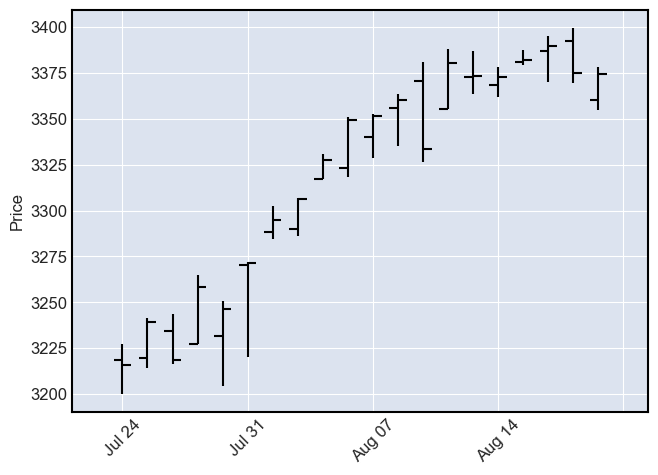

In [55]:
# 1. 下面是一个使用本地数据进行绘制的示例
import mplfinance as mpf
import pandas as pd
daily = pd.read_csv('./GSPC.csv',index_col=0,parse_dates=True)
daily.index.name = 'Date'
#print(daily.tail(3))
# 1.1 使用默认参数
mpf.plot(daily[-20:])

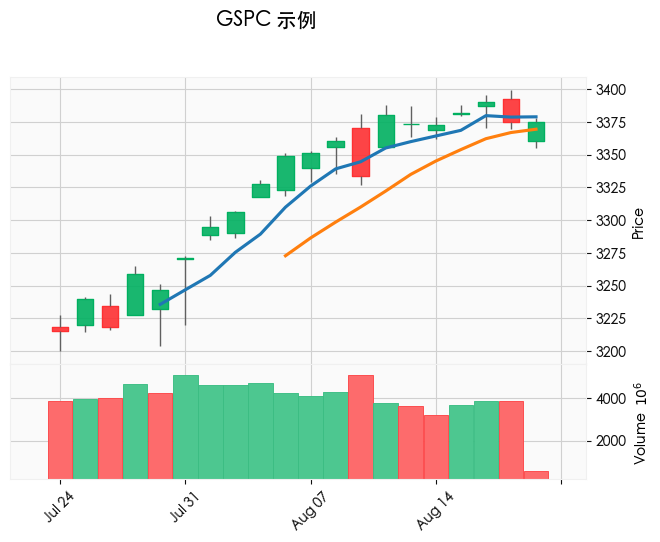

In [35]:
#1.2 画一个蜡烛图,并添加 5 日均线、10 日均线、成交量
# style 可选值：‘binance’,‘blueskies’,‘brasil’,‘charles’,‘checkers’,‘classic’,‘default’,‘mike’,‘nightclouds’,‘sas’,‘starsandstripes’,‘yahoo’
# font.family要选择支持中文的，不然会显示乱码
# 自定义画图格式
cus_style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.family': 'Heiti TC', 'axes.unicode_minus': 'False'})
mpf.plot(daily[-20:],type='candle',mav=(5,10),volume=True,style=cus_style,title='GSPC 示例')

In [39]:
# ps 查看本机支持的字体类型
from matplotlib import pyplot as plt
import matplotlib
def show_fonts():
    fonts = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
    for i in fonts:
        print(i)
#show_fonts()

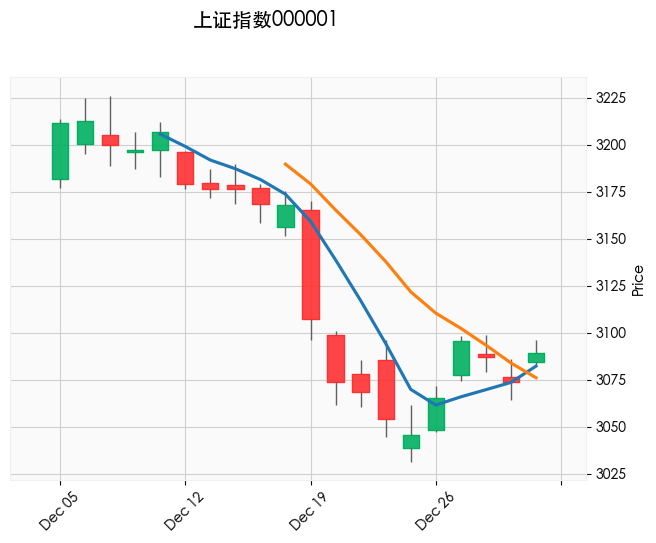

In [81]:
# 2. 使用akshare 获取的数据
## 2.1 绘制上证指数
import akshare as ak

## 2.1 绘制上证指数
stock_zh_index_daily_df = ak.stock_zh_index_daily_em(symbol="sh000001", start_date="20220101", end_date="20230101")
#stock_zh_index_daily_df = stock_zh_index_daily_df.iloc[-20:]
stock_zh_index_daily_df.index   = pd.DatetimeIndex(stock_zh_index_daily_df['date'])
#mpf.plot(data=stock_zh_index_daily_df)
mpf.plot(stock_zh_index_daily_df[-20:],type='candle',mav=(5,10),volume=False,style=cus_style,title='上证指数000001')

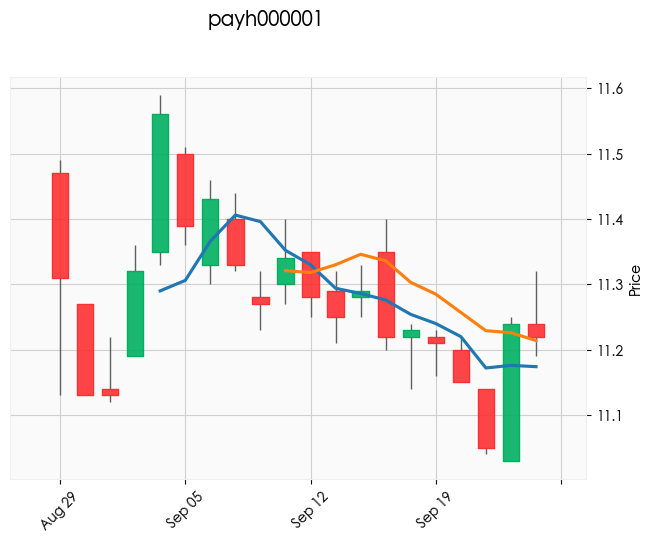

In [83]:
## 2.1 绘制平安银行
stock_payh_df = ak.stock_zh_a_daily(symbol="sz000001", adjust="qfq")
#print(stock_payh_df[-3:])
stock_payh_df.index   = pd.DatetimeIndex(stock_payh_df['date'])
#print(stock_payh_df)
mpf.plot(stock_payh_df[-20:],type='candle',mav=(5,10),style=cus_style,volume=False,title='payh000001')